In [1]:
!git clone https://github.com/kishkath/ERA3.git


Cloning into 'ERA3'...
remote: Enumerating objects: 770, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 770 (delta 40), reused 0 (delta 0), pack-reused 706 (from 1)
Receiving objects: 100% (770/770), 8.21 MiB | 18.68 MiB/s, done.
Resolving deltas: 100% (362/362), done.


In [2]:
import os
os.chdir("/kaggle/working/ERA3/Session16/")

print(">>> current working directory: ", os.getcwd())

>>> current working directory:  /kaggle/working/ERA3/Session16


In [3]:
import torchvision

train = torchvision.datasets.OxfordIIITPet("./data",split="trainval",target_types="segmentation",download=True)

100%|██████████| 792M/792M [00:40<00:00, 19.7MB/s] 


Extracting data/oxford-iiit-pet/images.tar.gz to data/oxford-iiit-pet


100%|██████████| 19.2M/19.2M [00:01<00:00, 16.3MB/s]


Extracting data/oxford-iiit-pet/annotations.tar.gz to data/oxford-iiit-pet


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


[INFO] Using device: cuda
[INFO] Loading dataset using CustomDataset...
Before Removing:  7390 7390
After Removing:  7384 7384
[INFO] Dataset ready: 5907 training samples, 1477 validation samples.
[INFO] Plotting Images: 
[INFO] Figure saved to train_samples.png


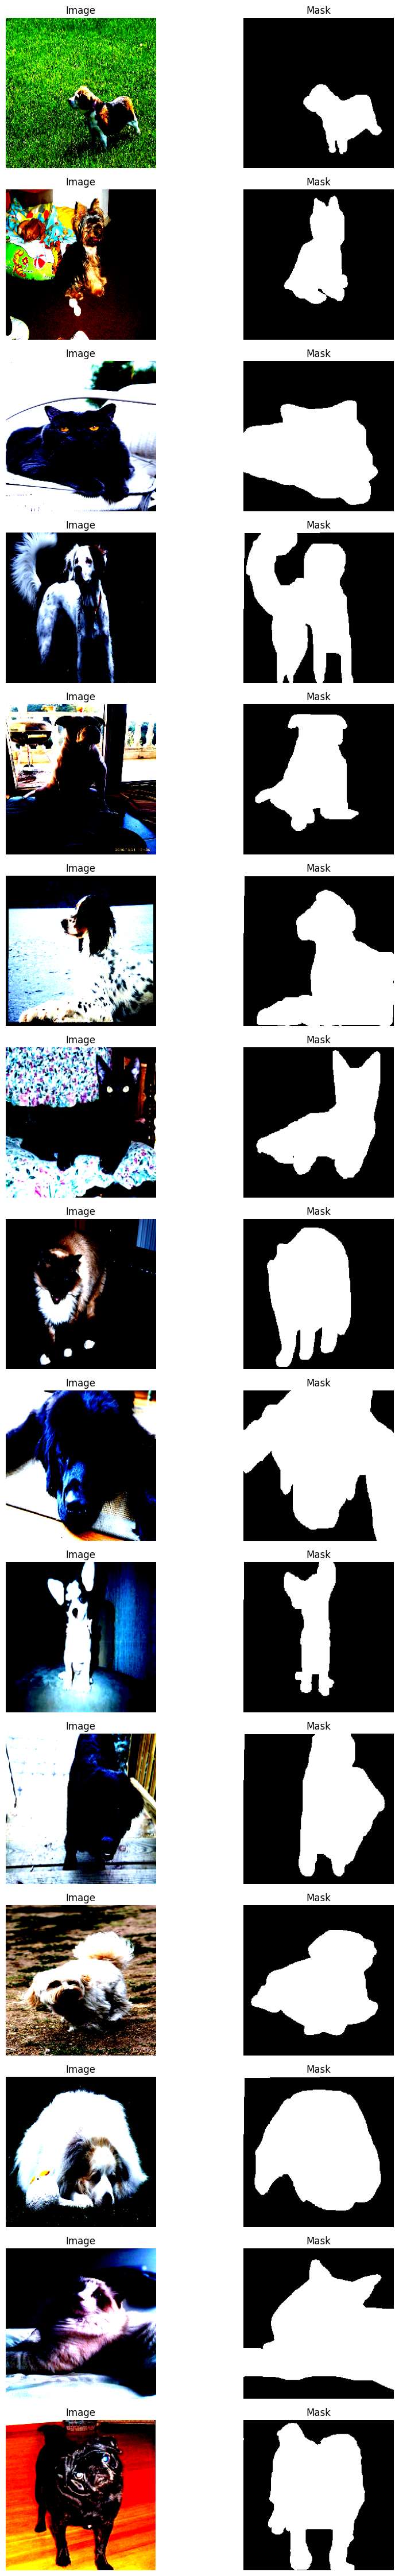

Encoder initialized successfully.
Decoder initialized successfully.
UNet model initialized successfully.
[INFO] UNet model initialized.
[INFO] Using loss function: bce
[INFO] Optimizer and scheduler set.

[INFO] Epoch 1/2


[INFO] Epoch 1: Avg Train Loss: 0.4080 | Train Accuracy: 81.60%


[INFO] Epoch 1: Avg Val Loss: 0.3723 | Val Accuracy: 84.07%
[INFO] Saved best model with loss 0.3723 to checkpoint.pth
[INFO] Epoch completed in 5m 34s

[INFO] Epoch 2/2


[INFO] Epoch 2: Avg Train Loss: 0.2911 | Train Accuracy: 88.07%


[INFO] Epoch 2: Avg Val Loss: 0.2786 | Val Accuracy: 89.08%
[INFO] Saved best model with loss 0.2786 to checkpoint.pth
[INFO] Epoch completed in 5m 40s
[INFO] Training complete.
[INFO] Running inference on image: /kaggle/input/infernce/cat.jpg


/kaggle/working/ERA3/Session16/main.py:123: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(args.checkpoint_path))


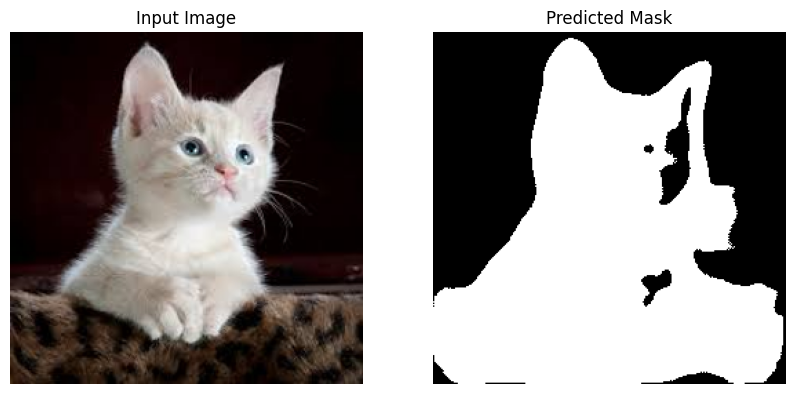

In [4]:
from types import SimpleNamespace
from main import main

args = SimpleNamespace(
    data_root="./data/oxford-iiit-pet" ,         # Dataset will be downloaded here.
    epochs=2,                  # Use a small number of epochs for testing.
    batch_size=32,
    lr=1e-4,
    step_size=8,
    gamma=0.1,
    bce_weight=0.5,
    loss_type="bce",
    checkpoint_path="checkpoint.pth",
    infer_image="/kaggle/input/infernce/cat.jpg"              # Provide a valid path to test inference, if desired.
)

main(args)